In [ ]:
# 합성곱 Convolution의 이해 : filter, stride, padding

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import correlate
from skimage import data # pip install scikit-image
# 이미지를 읽고 조작하는 다양한 기능 제공 파이썬 패키지
from skimage.color import rgb2gray
from skimage.transform import resize

(64, 64)


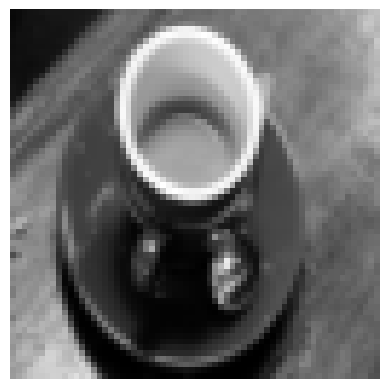

In [12]:
im = rgb2gray(data.coffee())
im = resize(im, (64,64))
print(im.shape)

im_pad = np.pad(im, 1, 'constant')

plt.axis('off')
plt.imshow(im, cmap='grey')
plt.show()

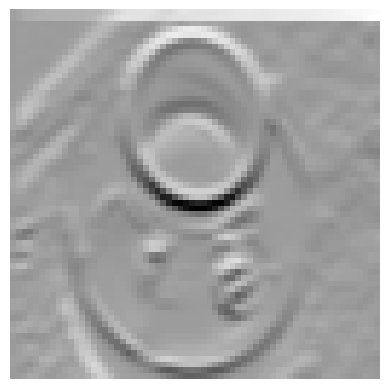

In [ ]:
# 합성곱 필터 (3, 3) - blur 메모리 적게 쓴다.
filter1 = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

new_image = np.zeros(im.shape)
im_pad = np.pad(im, 1, 'constant') # 상하좌우에 1 픽셀씩 추가. 새로 추가된 픽셀은 0으로 채움.

# 합성곱 연산
for i in range(im.shape[0]): # 세로방향
    for j in range(im.shape[1]): # 가로방향
        try:
            new_image[i, j] = \
                im_pad[i-1, j-1] * filter1[0,0] + \
                im_pad[i-1, j] * filter1[0,1] + \
                im_pad[i-1, j+1] * filter1[0,2] + \
                im_pad[i, j] * filter1[1,1] + \
                im_pad[i, j + 1] * filter1[1,2] + \
                im_pad[i + 1, j - 1] * filter1[2,0] + \
                im_pad[i + 1, j] * filter1[2,1] + \
                im_pad[i + 1, j + 1] * filter1[2,2]
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys')
plt.show()